### Name: Lalhriemsang Faihriem, RollNo: 210123036
### Dept. of Maths and Computing, B.Tech Final Year

## Project Title: 
Efficient Data Stream Anomaly Detection

## Aim: 
 To develop a Python script capable of detecting anomalies in a continuous data stream to identify unusual patterns, such as exceptionally high values or deviations from the norm.

## Objectives:

**Algorithm selection**: 

- For our case study since the data stream is dynamic and could contain seasonal variations (such as monthly or yearly cycles), as well as sudden shifts (concept drift), the selected algorithm must be robust and adaptable to these changes.

- The Isolation Forest algorithm was chosen because it is well-suited for detecting anomalies in data streams, which often contain regular patterns, seasonal variations, and random noise. It works by isolating outliers, making it effective at identifying unusual or unexpected values in the stream, even when the data has complex and dynamic behavior.

**Data Stream Simulation**: 
- To simulate a continuous data stream with regular patterns and occasional anomalies, we used a sine wave function (np.sin(i * 0.1)) for the regular data and introduced anomalies with a 1% probability by adding random spikes.

- We generate 1000 such synthetic real-time data points and run our Isolation Forest on these points.

**Anomaly Detection**:
- Model Training:
    The IsolationForest model is trained on the generated data, with a contamination parameter set to 1% (contamination=0.01), assuming that around 1% of the data points are anomalies.

- Anomaly Prediction:
    After training, the model predicts anomalies. Data points predicted as anomalies (label: -1) are flagged for further analysis.

- Results:
    Anomalous values and their corresponding time-stamps are stored and then visualized on a plot.

**Optimization**:

The Isolation Forest algorithm is optimized for anomaly detection in data streams by offering:

- Efficiency: It has a time complexity of O(n log n), making it fast for large datasets and suitable for real-time processing.

- Memory Efficiency: The algorithm isolates anomalies using decision trees, which requires less memory compared to distance-based methods.

- Scalability: It handles large data streams well and adapts to concept drift and seasonal variations without requiring full retraining.

- Real-time Performance: The model processes incoming data in small batches, efficiently detecting anomalies as the stream evolves.

- Contamination Control: By setting a 1% contamination rate, the model is fine-tuned to identify anomalies based on expected outlier proportions.

Overall, Isolation Forest is optimized for fast, scalable, and memory-efficient anomaly detection in real-time data streams.

**Visualization**:
- Visual plots are provided below using matplotlib where each anomaly is marked as red on the data stream

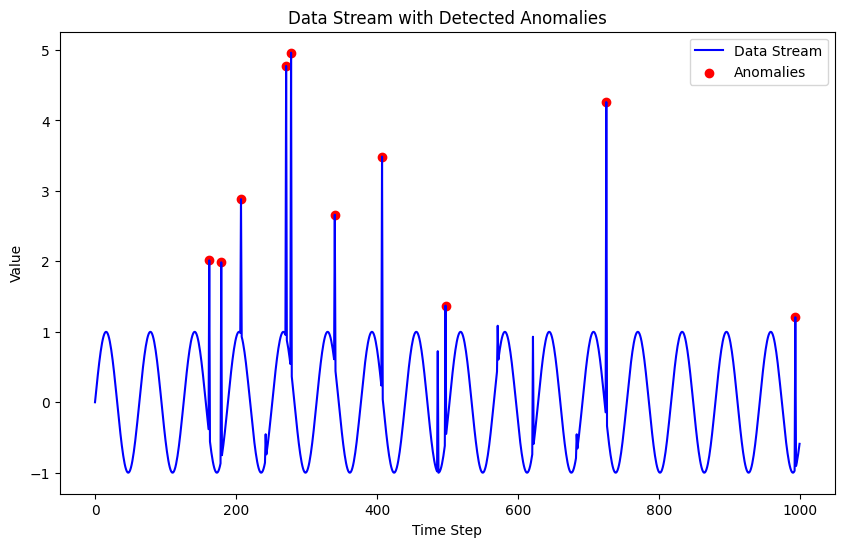

Detected Anomalies:
Value: 2.0135546928548407, Time-step: 162
Value: 1.9863839038939501, Time-step: 179
Value: 2.882155240426081, Time-step: 207
Value: 4.772416786085342, Time-step: 271
Value: 4.960664477535887, Time-step: 278
Value: 2.661200168758846, Time-step: 340
Value: 3.4856384500383872, Time-step: 407
Value: 1.371868551391903, Time-step: 497
Value: 4.260037174729016, Time-step: 725
Value: 1.206911625149588, Time-step: 993


In [13]:
import numpy as np
import json
import random
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Step 1: Simulate Synthetic Data Stream with Anomalies
def generate_synthetic_data():
    """Simulate synthetic data with occasional anomalies."""
    for i in range(1000):
        value = np.sin(i * 0.1)

        # Introduce a random spike as an anomaly with 1% probability
        if random.random() < 0.01:
            value += random.random() * 5  # Introduce a large random spike (anomaly)
        
        yield value

# Step 2: Collect Data and Detect Anomalies
data = []
time_steps = []
anomalies = []
anomaly_time_steps = []

# Simulate consuming data from a stream
for time_step, value in enumerate(generate_synthetic_data()):
    data.append([value])
    time_steps.append(time_step)
    
    # Stop after collecting 1000 data points
    if len(data) >= 1000:
        break

# Step 3: Anomaly Detection using Isolation Forest
# Train the anomaly detection model (Isolation Forest)
model = IsolationForest(contamination=0.01)  # 1% contamination (outliers)
model.fit(data)  # Fit the model to the data

# Predict anomalies (1 = normal, -1 = anomaly)
predictions = model.predict(data)

# Collect anomalies and their corresponding time-steps
for idx, pred in enumerate(predictions):
    if pred == -1:  
        anomalies.append(data[idx][0])  # Store the anomalous value
        anomaly_time_steps.append(time_steps[idx])  # Store the time-step

# Step 4: Visualize the Data Stream and Detected Anomalies
def visualize_stream(data, anomalies, anomaly_time_steps):
    """Visualize the data stream and anomalies."""
    plt.figure(figsize=(10, 6))
    plt.plot(data, label='Data Stream', color='blue')
    plt.scatter(anomaly_time_steps, anomalies, color='red', label='Anomalies')
    plt.title("Data Stream with Detected Anomalies")
    plt.xlabel("Time Step")
    plt.ylabel("Value")
    plt.legend()
    plt.show()

# Visualize the results
visualize_stream(data, anomalies, anomaly_time_steps)

# Print Detected Anomalies with Time-stamps
print("Detected Anomalies:")
for anomaly, time_step in zip(anomalies, anomaly_time_steps):
    print(f"Value: {anomaly}, Time-step: {time_step}")


## Observations:
##### We can clearly observe that the Isolation Forest is able to accurately classify the anomalies in our data stream and thus we have validated our choice of choosing Isolation Forest for our dataset